In [190]:
#Create development project location choice model
#Agents are development that happened between 2010 and 2023
#choices are developable parcels

import geopandas as gpd
import pandas as pd
import os
import pyproj
import numpy as np

mycrs=26910
state='CA'
#county='Tahoe County'
pyproj.datadir.set_data_dir(r'C:\Users\adc\anaconda3\envs\ox\Library\share\proj')

In [191]:
#get Parce 2023 landvalue and structure value data 
dataset_path = r"..\data\Data for Manhan.gdb"
Parcels = gpd.read_file(dataset_path, driver='fileGDB', layer='ParcelMaster_Redacted', ignore_geometry=False).to_crs(mycrs)
Parcels

,APN,PPNO,HSE_NUMBR,UNIT_NUMBR,STR_DIR,STR_NAME,STR_SUFFIX,APO_ADDRESS,PSTL_TOWN,PSTL_STATE,...,WITHIN_BONUSUNIT_BNDY,GlobalID,created_user,created_date,last_edited_user,last_edited_date,PLAN_TYPE,Shape_Length,Shape_Area,geometry
0,048-041-03,4.804103e+06,24101,,,MOUNT ROSE,HWY,24101 MOUNT ROSE HWY,Incline Village,NV,...,0,{7C073190-24BE-4756-9B4E-374A13675CCD},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:08+00:00,,310.956047,5.805863e+03,"MULTIPOLYGON (((763453.169 4357152.779, 763446..."
1,048-041-20,4.804120e+06,24655,,,MOUNT ROSE,HWY,24655 MOUNT ROSE HWY,Incline Village,NV,...,0,{3AFCD8A4-D768-4D06-846D-65C65C359B9F},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,,31908.073673,4.389954e+07,"MULTIPOLYGON (((758228.855 4351689.272, 758044..."
2,048-042-02,4.804202e+06,0,,,MOUNT ROSE,HWY,0 MOUNT ROSE HWY,Reno,NV,...,0,{54BB5CDD-2B65-493B-A041-A66D8469DC9C},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,,7764.759770,3.353371e+06,"MULTIPOLYGON (((766110.196 4355162.376, 766145..."
3,048-042-03,4.804203e+06,0,,,MOUNT ROSE,HWY,0 MOUNT ROSE HWY,Incline Village,NV,...,0,{B684DE8F-7732-4BA5-B862-BAC0B1A84BCE},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,AREA PLAN,3931.795982,4.409068e+05,"MULTIPOLYGON (((765760.298 4353614.956, 765658..."
4,048-140-03,4.814003e+06,0,,,MOUNT ROSE,HWY,0 MOUNT ROSE HWY,Incline Village,NV,...,0,{DD1A1490-BC51-4151-BB3F-E8D05B17F84B},None,NaT,TRPA_PORTAL_ADMIN,2023-05-19 19:28:09+00:00,AREA PLAN,956.340444,2.023828e+04,"MULTIPOLYGON (((765501.014 4354660.606, 765512..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61226,1318-10-310-096,1.318103e+11,746,,,LINCOLN,HWY,746 LINCOLN HY,Zephyr Cove,NV,...,0,{FC0D5ABD-D90B-4660-BE37-856106975785},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,143.845906,8.888403e+02,"MULTIPOLYGON (((764148.357 4321679.841, 764133..."
61227,1318-10-310-097,1.318103e+11,0,,,,,,Zephyr Cove,NV,...,0,{6162DDF6-EFFC-4058-A2AE-A11D69503EF7},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,705.437384,8.741106e+03,"MULTIPOLYGON (((764101.905 4321692.257, 764094..."
61228,1318-10-417-055,1.318104e+11,225,,S,MARTIN,DR,225 S MARTIN DR,Zephyr Cove,NV,...,0,{2F9F27DD-3782-4CF6-AE5B-8297D6877EC8},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,130.495432,9.861739e+02,"MULTIPOLYGON (((763843.225 4321172.292, 763834..."
61229,1318-10-310-094,1.318103e+11,716,,,LINCOLN,HWY,716 LINCOLN HY,Zephyr Cove,NV,...,0,{22585386-55A6-4505-BB2E-988A77035E87},SDE,2023-11-29 18:06:23+00:00,SDE,2024-01-09 00:09:06+00:00,PLAN AREA STATEMENT,186.514730,1.701036e+03,"MULTIPOLYGON (((764049.931 4321564.766, 764028..."


In [192]:
selcols=['APN',
 'PPNO',
 'COUNTY_LANDUSE_CODE',
 'COUNTY_LANDUSE_DESCRIPTION',
 'EXISTING_LANDUSE',
 'REGIONAL_LANDUSE',
 'IPES_SCORE',
 'AS_LANDVALUE',
 'AS_IMPROVALUE',
 'AS_SUM',
 'TAX_LANDVALUE',
 'TAX_IMPROVALUE',
 'TAX_SUM',
 'TAX_YEAR',
 'YEAR_BUILT',
 'UNITS',
 'BEDROOMS',
 'BATHROOMS',
 'BUILDING_SQFT',
 'ESTIMATED_COVERAGE_ALLOWED',
 'IMPERVIOUS_SURFACE_SQFT',
 'SOIL_1974',
 'SOIL_2003',
 'CATCHMENT',
 'HRA_NAME',
 'WATERSHED_NUMBER',
 'WATERSHED_NAME',
 'PRIORITY_WATERSHED',
 'FIREPD',
 'PLAN_ID',
 'PLAN_NAME',
 'ZONING_ID',
 'ZONING_DESCRIPTION',
 'TOWN_CENTER',
 'LOCATION_TO_TOWNCENTER',
 'TOLERANCE_ID',
 'TAZ',
 'INDEX_1987',
 'LITTORAL',
 'WITHIN_TRPA_BNDY',
 'LOCAL_PLAN_HYPERLINK',
 'DESIGN_GUIDELINES_HYPERLINK',
 'LTINFO_HYPERLINK',
 'PARCEL_ACRES',
 'PARCEL_SQFT',
 'WITHIN_BONUSUNIT_BNDY',
 'GlobalID',
  'PLAN_TYPE',
 'Shape_Length',
 'Shape_Area',
 'geometry']
Parcels=Parcels[selcols].copy()
Parcels.describe()

,PPNO,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,TAX_LANDVALUE,TAX_IMPROVALUE,TAX_SUM,BUILDING_SQFT,ESTIMATED_COVERAGE_ALLOWED,IMPERVIOUS_SURFACE_SQFT,WATERSHED_NUMBER,TAZ,LITTORAL,WITHIN_TRPA_BNDY,PARCEL_ACRES,PARCEL_SQFT,WITHIN_BONUSUNIT_BNDY,Shape_Length,Shape_Area
count,6.123100e+04,10896.000000,6.123100e+04,6.122900e+04,6.123100e+04,6.123100e+04,6.122900e+04,6.123000e+04,61094.000000,6.123100e+04,6.118700e+04,61231.000000,61228.000000,61231.000000,61231.000000,61231.000000,6.123100e+04,61231.000000,61231.000000,6.123100e+04
mean,1.382094e+10,697.689519,1.719273e+05,2.439741e+05,4.118386e+05,2.669511e+05,2.969932e+05,5.012708e+05,1738.635038,7.682337e+03,3.686774e+03,34.504924,139.238878,0.035293,0.982444,4.012703,1.747932e+05,0.626807,201.395161,1.624187e+04
std,4.063009e+10,256.712212,5.843673e+05,6.809014e+05,1.055628e+06,1.045496e+06,1.055601e+06,1.339769e+06,5699.517633,9.473805e+04,2.131436e+04,17.527456,84.482162,0.184520,0.131334,82.024888,3.573003e+06,0.483657,630.507568,3.319440e+05
min,7.011010e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000042,1.833065e+00,0.000000,1.716021,1.702973e-01
25%,2.320103e+07,649.000000,1.670400e+04,0.000000e+00,5.299200e+04,1.873800e+04,0.000000e+00,6.072950e+04,0.000000,2.167555e+02,4.959425e+02,17.000000,65.000000,0.000000,1.000000,0.115150,5.015897e+03,0.000000,91.596634,4.659941e+02
50%,3.335102e+07,767.000000,7.532900e+04,1.089210e+05,2.071200e+05,1.045500e+05,1.531090e+05,2.681465e+05,1320.000000,1.501813e+03,1.492528e+03,42.000000,134.000000,0.000000,1.000000,0.226335,9.859116e+03,1.000000,124.701966,9.160272e+02
75%,9.316004e+07,852.000000,1.664640e+05,3.122320e+05,4.768455e+05,2.414520e+05,3.511450e+05,5.627508e+05,2020.000000,2.629049e+03,2.647079e+03,44.000000,209.000000,0.000000,1.000000,0.325475,1.417767e+04,1.000000,155.544628,1.317294e+03
max,1.419060e+11,1043.000000,3.216606e+07,7.758222e+07,8.717022e+07,7.397625e+07,1.090273e+08,8.717022e+07,590160.000000,6.487692e+06,1.643423e+06,64.000000,297.000000,1.000000,1.000000,10847.811115,4.725307e+08,1.000000,38419.036865,4.389954e+07


In [193]:
Parcels[['AS_LANDVALUE',
 'AS_IMPROVALUE',
 'AS_SUM',
 'TAX_LANDVALUE',
 'TAX_IMPROVALUE',
 'TAX_SUM',
 'TAX_YEAR',
 'YEAR_BUILT',
 'UNITS',
 'BEDROOMS',
 'BATHROOMS',
 'BUILDING_SQFT',
 'ESTIMATED_COVERAGE_ALLOWED',
 'IMPERVIOUS_SURFACE_SQFT',
 'SOIL_1974',
 'SOIL_2003']].dtypes

AS_LANDVALUE                    int64
AS_IMPROVALUE                 float64
AS_SUM                          int64
TAX_LANDVALUE                   int64
TAX_IMPROVALUE                float64
TAX_SUM                       float64
TAX_YEAR                       object
YEAR_BUILT                     object
UNITS                          object
BEDROOMS                       object
BATHROOMS                      object
BUILDING_SQFT                 float64
ESTIMATED_COVERAGE_ALLOWED    float64
IMPERVIOUS_SURFACE_SQFT       float64
SOIL_1974                      object
SOIL_2003                      object
dtype: object

In [194]:
#Convert selected columns to numeric
columns_to_convert = ['UNITS','BEDROOMS', 'BATHROOMS' ]
Parcels[columns_to_convert]=Parcels[columns_to_convert].apply(pd.to_numeric, errors='coerce')
Parcels['YEAR_BUILT']=Parcels['YEAR_BUILT'].replace('N/A', 0)
Parcels['YEAR_BUILT'] = Parcels['YEAR_BUILT'].fillna(0).astype(int)

In [195]:
#Calculate percent of improved value as total assessed value, floor to area ratio, land value per square foot, and square foot per unit
Parcels['per_AS_IMPROVALUE']=Parcels['AS_IMPROVALUE']/Parcels['AS_SUM'].map(lambda x: x if x>0 else 1) 
Parcels['FAR']=Parcels['BUILDING_SQFT']/Parcels['PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['lval_per_sqft']=Parcels['AS_LANDVALUE']/Parcels['PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['sqft_per_unit']=Parcels['BUILDING_SQFT']/Parcels['UNITS'].map(lambda x: x if x>0 else 1) 

In [196]:
#Read water file from TRPA data portal
water_file=r"..\data\nhd_water.geojson"
water=gpd.read_file(water_file).to_crs(mycrs)

#read wetland, wood and park data obtained from OSM
wetland_file=r"..\data\osm\wetland.geojson"
wetland=gpd.read_file(wetland_file).to_crs(mycrs)
wood_file=r"..\data\osm\wood.geojson"
wood=gpd.read_file(wood_file).to_crs(mycrs)
park_file=r"..\data\osm\park.geojson"
park=gpd.read_file(park_file).to_crs(mycrs)

#Calcualte Water Body Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),water.loc[water.geometry.is_valid].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
waterinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(waterinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'water'}, inplace=True)


#Calcualte Wetland Body Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),wetland.loc[wetland.type.isin(['MultiPolygon','Polygon'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
wetlandinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(wetlandinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'wetland'}, inplace=True)

#Calcualte Wood Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),wood.loc[wood.type.isin(['MultiPolygon','Polygon'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
woodinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(woodinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'wood'}, inplace=True)

#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),park.loc[park.geometry.is_valid].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
parkinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(parkinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'park'}, inplace=True)

Parcels[['water','wood','wetland','park']]=Parcels[['water','wood','wetland','park']].fillna(0)

<Axes: >

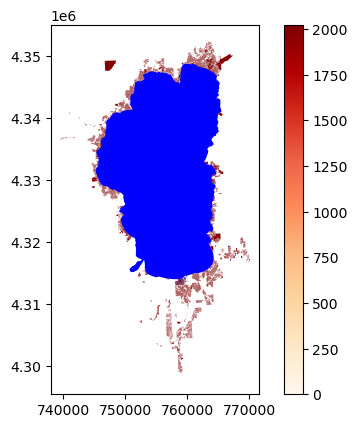

In [197]:
ax=water.loc[water.GNIS_Name=='Lake Tahoe'].plot(color='blue')
Parcels.loc[(Parcels.BUILDING_SQFT>0)].plot(column='YEAR_BUILT', cmap='OrRd', ax=ax, legend=True)

<Axes: ylabel='Frequency'>

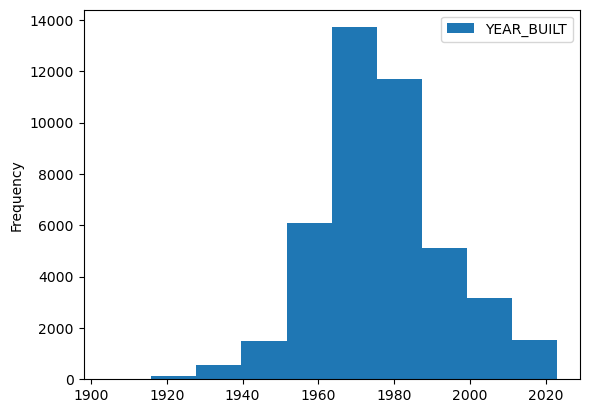

In [198]:
Parcels.loc[Parcels.YEAR_BUILT>1900,['YEAR_BUILT']].plot.hist(bins=10)

In [199]:
Parcels['dist2tahoe'] = Parcels.apply(lambda r: r.geometry.distance(water.loc[water.GNIS_Name=='Lake Tahoe'].geometry), axis=1)


<Axes: >

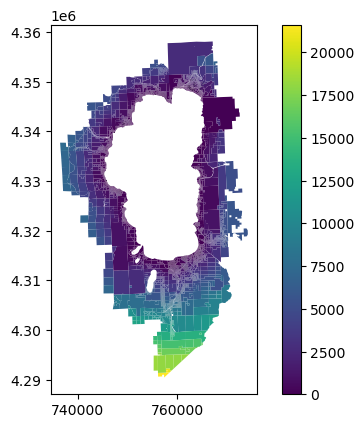

In [200]:
Parcels.plot(column='dist2tahoe', legend=True)

In [201]:
#read in land capability file from TRPA data portal
bailey_file=r"..\Data\landcapability_bailey.geojson"
bailey=gpd.read_file(bailey_file).to_crs(mycrs)
#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),bailey.loc[bailey.CAPABILITY=='3'].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
bailey3inparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(bailey3inparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'bailey3area'}, inplace=True)

#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),bailey.loc[bailey.CAPABILITY.isin(['4','5','6','7'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
bailey4pinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(bailey4pinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'bailey4parea'}, inplace=True)

In [202]:
#Read in multifamily data with density from TRPA data portal
mutlifamz_file=r"..\Data\areas_zoned_multifamily.geojson"
mutlifamz=gpd.read_file(mutlifamz_file).to_crs(mycrs)
mutlifamz.loc[mutlifamz.UNIT.isin(['people per acre', 'persons per acre']),'DENSITY']



51    25
71    15
Name: DENSITY, dtype: object

<Axes: ylabel='Frequency'>

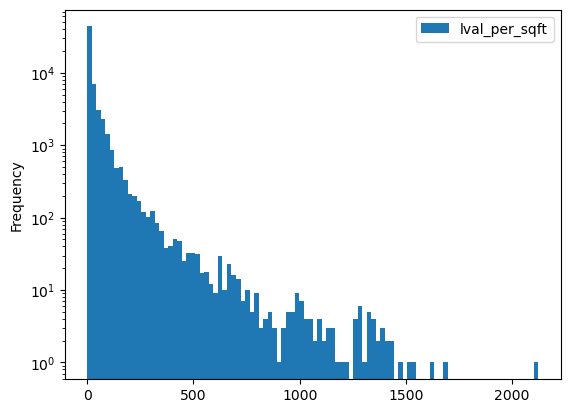

In [203]:
Parcels[['lval_per_sqft']].plot.hist(log=True, bins=100)

<Axes: >

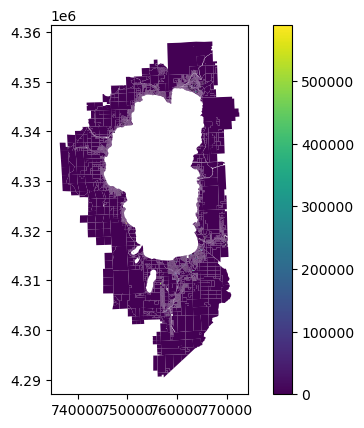

In [204]:
Parcels.plot('sqft_per_unit', legend=True)

In [205]:
#create a centroid geometry to faciliate the join to parcel with multifamily zone
Parcels.loc[:,'centroid']=Parcels.geometry.centroid
Parcels.loc[:,'polygeom']=Parcels.geometry
Parcels.set_geometry('centroid', inplace=True)
Parcels=Parcels.sjoin(mutlifamz[['DENSITY', 'UNIT','geometry']], how='left', predicate='within')
Parcels.drop(columns=['index_right'], inplace=True)
Parcels.rename(columns={'index_left':'index', 'UNIT':'DENSITYUNIT'}, inplace=True)

In [206]:
import osmnx as ox
bnds=Parcels.to_crs(4326).total_bounds
mybbox=(bnds[3],bnds[1],bnds[2],bnds[0])
#Get OSM network for driving for the TRPA area
G = ox.graph_from_bbox(bbox=mybbox, network_type="drive")
G=ox.projection.project_graph(G, to_crs=mycrs)

#Create simplifed network and merge nodes within 5 meters together to avoid overcounting of intersections. 
#remove dead_ends to only count intersections with degree 2 or more
G_simplified=ox.simplification.consolidate_intersections(
    G,
    tolerance=5,
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

nodes_s,edges_s=ox.graph_to_gdfs(G_simplified)


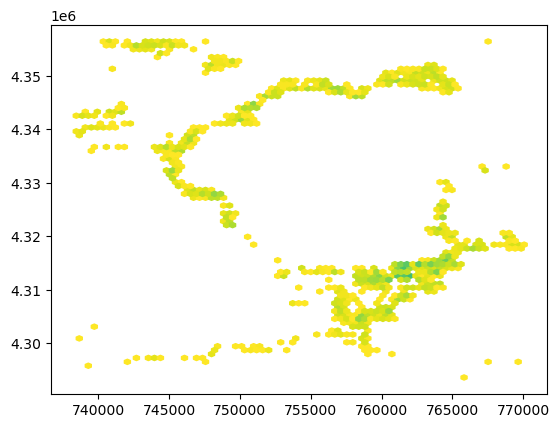

In [207]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
def polygons_from_hexbins(collection):
    hex_polys=collection.get_paths()[0].vertices
    hex_array=[]
    for xs, ys in collection.get_offsets():
        hex_x=np.add(hex_polys[:,0], xs)
        hex_y=np.add(hex_polys[:,1], ys)
        hex_array.append(Polygon(np.vstack([hex_x, hex_y]).T))
        
    counts=collection.get_array()
    return gpd.GeoDataFrame({'count': counts, 'geometry':hex_array})
        
cmap='viridis_r'
collection=plt.hexbin(x=nodes_s['x'], y=nodes_s['y'], gridsize=75, cmap=cmap, mincnt=1,  vmax=100)
        
hex_gdf=polygons_from_hexbins(collection).set_crs(mycrs)
hex_gdf.to_file(r'hex_gdf_intersectioncounts.geojson', driver='GeoJSON')



<Axes: >

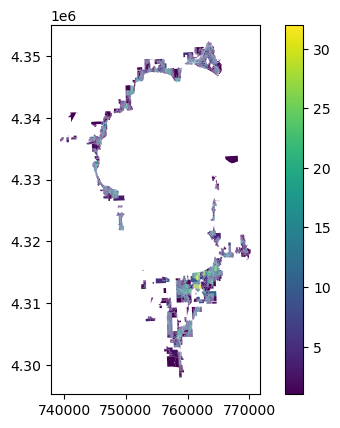

In [208]:
Parcels=Parcels.sjoin(hex_gdf, how='left', predicate='within')
Parcels.drop(columns=['index_right'], inplace=True)
Parcels.rename(columns={'index_left':'index', 'count':'cnt_intersections'}, inplace=True)
  

Parcels.drop(columns=['centroid'], inplace=True)
Parcels.set_geometry('polygeom', inplace=True)
Parcels.plot('cnt_intersections', legend=True)

In [209]:
#create dummy variable to indicate whether parcel is located in developable bailey 3 or 4, 5, 6, 7 zones
Parcels.loc[:,'isbailey4p']=0
Parcels.loc[:,'isbailey3']=0
Parcels.loc[Parcels.bailey4parea>Parcels.Shape_Area*0.8, 'isbailey4p']=1
Parcels.loc[Parcels.bailey3area>Parcels.Shape_Area*0.8, 'isbailey3']=1
Parcels.loc[:,'DENSITY']=Parcels.DENSITY.astype('d')
Parcels.loc[:,'usableland']=Parcels.apply(lambda r: r['PARCEL_SQFT']-10.7639104*(r['water']+r['wood']+r['park']+r['wetland']), axis=1)
Parcels.loc[:,'Acres10p']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x>=435600 else 0)
Parcels.loc[:,'Acres5to10']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x>=267800 and x<435600 else 0)
Parcels.loc[:,'Acres1to5']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<267800 and x>=43560 else 0)
Parcels.loc[:,'Acreshalfto1acres']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<43560 and x>=26780 else 0)
Parcels.loc[:,'Acresquartertohalfacres']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<26780 and x>=13390 else 0)
Parcels.loc[:,'Acreslt4000sqft']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<4000 else 0)

Parcels.loc[:,'DUA']=Parcels.loc[:,'UNITS']*43560.0/Parcels.loc[:,'usableland']
Parcels.loc[(Parcels.DUA>Parcels.DENSITY) | (Parcels.DENSITY.isnull()) ,'DENSITY']=Parcels.loc[(Parcels.DUA>Parcels.DENSITY) | (Parcels.DENSITY.isnull()), 'DUA']
Parcels.loc[:, 'cnt_intersections_n']=Parcels.loc[:, 'cnt_intersections']/Parcels.loc[:, 'cnt_intersections'].max()
Parcels.loc[:, 'dist2tahoe_n']=Parcels.loc[:, 'dist2tahoe']/Parcels.loc[:, 'dist2tahoe'].max()

c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


<Axes: >

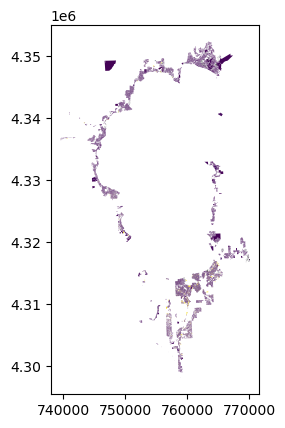

In [210]:
Parcels.loc[(Parcels.YEAR_BUILT<=2010) & (Parcels.BUILDING_SQFT>0), 'bldage']=Parcels.loc[(Parcels.YEAR_BUILT<=2010) & (Parcels.BUILDING_SQFT>0),'YEAR_BUILT'].map(lambda x: 2010-x)
Parcels.loc[(Parcels.YEAR_BUILT<=2010) & (Parcels.BUILDING_SQFT>0)].plot(column='bldage')

In [291]:
#Get 9 neibors
import numpy as np
from sklearn.neighbors import BallTree
k=8
# the formula to calculate radiant required by haversine
Parcels['lat_rad'] = np.deg2rad(Parcels.geometry.centroid.to_crs(4326).y)
Parcels['lon_rad'] = np.deg2rad(Parcels.geometry.centroid.to_crs(4326).x)

ball_tree = BallTree(Parcels[["lat_rad", "lon_rad"]], metric="haversine")

neighbors = ball_tree.query(
    Parcels[["lat_rad", "lon_rad"]],
    k=(
        k + 1
    ),  # k + 1 because we remove the address itself later, hence we need k - 1 = k_desired
    return_distance=False,  
    sort_results=True,
)

neighbors

array([[    0,     1,     5, ...,    25,    23,    24],
       [    1,     0,     5, ...,  4840,  4841,  4842],
       [    2,     4,     3, ...,     7,     8,    41],
       ...,
       [61228, 16788, 61224, ..., 16199, 16235, 12673],
       [61229, 15002, 15067, ..., 15068, 15000, 61227],
       [61230, 16310, 11699, ..., 11697, 11698, 15803]], dtype=int64)

In [292]:
# Save to an NPY file
np.save('../data/neighbors.npy', neighbors)


In [ ]:
import json as pkl
arr = [...]
with open('../data/neighbors.pkl', 'wb') as f:
    pkl.dump(arr, f)

In [212]:
nei_parcel = pd.DataFrame(index=Parcels.index)
ncols=['neighbors_PARCEL_SQFT','neighbors_usableland','neighbors_age','neighbors_totalunits','neighbors_BUILDING_SQFT','neighbors_AS_SUM','neighbors_AS_IMPROVALUE','neighbors_AS_LANDVALUE','neighbors_per_built']
for c in ncols:
   nei_parcel[c]=None

In [213]:
# remove the address/point itself from the array because it itself is its nearest neighbour
neighbors = neighbors[:, 1:]
#calculate neiboring parcels total land sqft
nei_parcel['neighbors_PARCEL_SQFT']= [
    Parcels['PARCEL_SQFT'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels totalusable land sqft
nei_parcel['neighbors_usableland']= [
    Parcels['usableland'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels total building ages
nei_parcel['neighbors_age']= [
    Parcels['bldage'].iloc[n].sum() for n in neighbors
]


In [214]:
Parcels.loc[:, 'AS_SUM_nonew']=Parcels.apply(lambda r: r.AS_LANDVALUE if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.AS_SUM, axis=1)

#calculate neiboring parcels total value as_sum
nei_parcel['neighbors_AS_SUM']= [
    Parcels['AS_SUM_nonew'].iloc[n].sum() for n in neighbors
]

Parcels.drop(columns=['AS_SUM_nonew'], inplace=True)

#calculate neiboring parcels assessed land value
nei_parcel['neighbors_AS_LANDVALUE']= [
    Parcels['AS_LANDVALUE'].iloc[n].sum() for n in neighbors
]

Parcels.loc[:, 'BUILDING_SQFT_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.BUILDING_SQFT, axis=1)

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_BUILDING_SQFT']= [
    Parcels['BUILDING_SQFT_nonew'].iloc[n].sum() for n in neighbors
]


Parcels.loc[:, 'AS_IMPROVALUE_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.AS_IMPROVALUE, axis=1)

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_AS_IMPROVALUE']= [
    Parcels['AS_IMPROVALUE_nonew'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels percent with building_sqft>0
nei_parcel['neighbors_per_built']= [
   Parcels['BUILDING_SQFT_nonew'].iloc[n].map(lambda x: 1 if x>0 else 0).sum()/8.0 for n in neighbors
]

Parcels.drop(columns=['BUILDING_SQFT_nonew'], inplace=True)
Parcels.drop(columns=['AS_IMPROVALUE_nonew'], inplace=True)


Parcels.loc[:, 'UNITS_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.UNITS, axis=1)


#calculate neiboring parcels total units
nei_parcel['neighbors_totalunits']= [
   Parcels['UNITS_nonew'].iloc[n].sum() for n in neighbors
]

Parcels.drop(columns=['UNITS_nonew'], inplace=True)

In [215]:
#calculate neighboring parcels average percentage of improved value and FAR ratio
nei_parcel['neighbors_per_AS_IMPROVALUE']=nei_parcel['neighbors_AS_IMPROVALUE']/nei_parcel['neighbors_AS_SUM'].map(lambda x: x if x>0 else 1) 
nei_parcel['neighbors_FAR']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
nei_parcel['neighbors_lval_per_sqft']=nei_parcel['neighbors_AS_LANDVALUE']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)
nei_parcel['neighbors_bldsqft_per_unit']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_totalunits'].map(lambda x: x if x>0 else 1)
nei_parcel['neighbors_unit_per_acre']=nei_parcel['neighbors_totalunits']*43560.0/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)


In [216]:
Parcels = pd.concat([Parcels, nei_parcel[['neighbors_per_AS_IMPROVALUE','neighbors_FAR','neighbors_age','neighbors_per_built','neighbors_lval_per_sqft','neighbors_bldsqft_per_unit','neighbors_unit_per_acre']]], axis=1)
Parcels

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,bldage,lat_rad,lon_rad,neighbors_per_AS_IMPROVALUE,neighbors_FAR,neighbors_age,neighbors_per_built,neighbors_lval_per_sqft,neighbors_bldsqft_per_unit,neighbors_unit_per_acre
0,048-041-03,4.804103e+06,140,"Vacant, commercial",Open Space,,NaN,3309,0.0,3309,...,NaN,0.686322,-2.093423,NaN,0.000000,0.0,0.000,0.055981,0.000000,0.000000
1,048-041-20,4.804120e+06,120,"Vacant, single family",Open Space,,NaN,25891687,0.0,25891687,...,NaN,0.686029,-2.093758,NaN,0.000050,29.0,0.125,0.065134,2706.000000,0.000803
2,048-042-02,4.804202e+06,100,"Vacant, other or unknown",Open Space,,NaN,2014352,5330.0,2019682,...,NaN,0.685863,-2.092817,NaN,0.000000,0.0,0.000,0.060802,0.000000,0.000000
3,048-042-03,4.804203e+06,120,"Vacant, single family",Open Space,Conservation,NaN,261641,0.0,261641,...,NaN,0.685774,-2.093031,NaN,0.000000,0.0,0.000,0.060147,0.000000,0.000000
4,048-140-03,4.814003e+06,120,"Vacant, single family",Vacant,Conservation,NaN,602455,0.0,602455,...,NaN,0.685892,-2.093033,NaN,0.000000,0.0,0.000,0.055343,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61226,1318-10-310-096,1.318103e+11,200,None,Single Family Residential,Residential,NaN,721000,507778.0,1228778,...,NaN,0.680753,-2.093522,NaN,0.200438,271.0,0.750,51.953133,2296.666667,3.801630
61227,1318-10-310-097,1.318103e+11,270,None,Condominium Common Area,Residential,NaN,0,0.0,0,...,NaN,0.680748,-2.093546,NaN,0.142702,252.0,0.625,63.926082,1541.777778,4.031786
61228,1318-10-417-055,1.318104e+11,200,None,Single Family Residential,Residential,NaN,253750,224817.0,478567,...,NaN,0.680675,-2.093585,NaN,0.236375,179.0,0.750,15.443252,3205.333333,3.212295
61229,1318-10-310-094,1.318103e+11,200,None,Single Family Residential,Residential,NaN,966000,44566.0,1010566,...,NaN,0.680738,-2.093542,NaN,0.077414,325.0,0.750,25.593903,1404.300000,2.401315


In [217]:
Parcels['IPES_SCORE_n']=Parcels['IPES_SCORE']/Parcels['IPES_SCORE'].max()
Parcels['lval_per_sqft_n']=np.log(Parcels['lval_per_sqft'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['lval_per_sqft'].max())
Parcels['neighbors_lval_per_sqft_n']=np.log(Parcels['neighbors_lval_per_sqft'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_lval_per_sqft'].max())
Parcels['neighbors_bldsqft_per_unit_n']=np.log(Parcels['neighbors_bldsqft_per_unit'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_bldsqft_per_unit'].max())
Parcels['neighbors_age_n']=Parcels['neighbors_age']/(Parcels['neighbors_per_built'].map(lambda x: 1 if (x==0) | (x is None) else x)*8)
Parcels['neighbors_age_n']=Parcels['neighbors_age_n']/Parcels['neighbors_age_n'].max()

    

In [219]:
Parcels.loc[(Parcels.YEAR_BUILT>2010) & (Parcels.BUILDING_SQFT>0),'EXISTING_LANDUSE'].unique()

array(['Single Family Residential', 'Condominium',
       'Condominium Common Area', 'Commercial',
       'Multi-Family Residential', 'Vacant', 'Tourist Accommodation',
       'Public Service'], dtype=object)

In [220]:
Parcels.loc[Parcels.BUILDING_SQFT.isnull(), ['APN','BUILDING_SQFT','EXISTING_LANDUSE']]

,APN,BUILDING_SQFT,EXISTING_LANDUSE
1886,1419-00-001-002,NaN,Open Space
61052,090-282-018,NaN,Commercial
61053,097-140-043,NaN,Single Family Residential
61054,116-080-003,NaN,Single Family Residential
61055,097-130-030,NaN,Multi-Family Residential
...,...,...,...
61226,1318-10-310-096,NaN,Single Family Residential
61227,1318-10-310-097,NaN,Condominium Common Area
61228,1318-10-417-055,NaN,Single Family Residential
61229,1318-10-310-094,NaN,Single Family Residential


In [221]:
Parcels['BUILDING_SQFT']=Parcels['BUILDING_SQFT'].fillna(0)

In [222]:
Parcels.loc[Parcels.DUA.isnull(), ['APN','BUILDING_SQFT','EXISTING_LANDUSE','DUA','DENSITY']]

,APN,BUILDING_SQFT,EXISTING_LANDUSE,DUA,DENSITY
1483,097-050-097,0.0,Public Service,NaN,NaN
1484,097-020-012,0.0,Open Space,NaN,NaN
1485,097-060-027,0.0,Open Space,NaN,NaN
1486,085-010-011,0.0,Open Space,NaN,NaN
1487,097-020-014,0.0,Open Space,NaN,NaN
...,...,...,...,...,...
61226,1318-10-310-096,0.0,Single Family Residential,NaN,NaN
61227,1318-10-310-097,0.0,Condominium Common Area,NaN,NaN
61228,1318-10-417-055,0.0,Single Family Residential,NaN,NaN
61229,1318-10-310-094,0.0,Single Family Residential,NaN,NaN


In [223]:
unbuildable_cats=['Vacant, other or unknown',
       'Other, unbuildable: roads, restrictions, terrain',
       'Splinter, unbuildable: small size or shape',
       'Vacant - Public Use Lands',
       'Vacant - Splinter and Other Unbuildable', 'Parks for Public Use',
       'Communication, Transportation, and Utility Property of a Local Nature Under Construction',
       'AGP MSC RURAL RESTRICTIVE ZONING - CLCA (ACTIVE)',
       'RLU MSC ENV. SENSITIVE LAND - RESTRICTED USE',
 'SKI FACILITY',
     'UTILITIES, PUBLIC & PRIVATE',
       'RIVERS, LAKES, RESERVOIR, CANAL', 'HIGHWAYS, ROADS, STREETS',
 'TIMBERLAND, ZONED TPZ',
       'Communication, Transportation, and Utility Property of a Local Nature',
       'TPZ MSC TIMBER PRESERVE ZONING - ACTIVE',
       'AGP MSC RURAL RESTRICTIVE ZONING - NON-RENEWAL',
       'CONSERVATION EASEMENT RESTRICTIONS', 
       'COMMON AREA','NON-PROFIT CAMPS/PARKS', 'GOLF COURSE', 'GREENBELT', 'TIMBERLAND, UNRESTRICTED']

In [224]:
Parcels.loc[:, 'is_towncenter']=0
Parcels.loc[:, 'is_outsidebuffer']=0
Parcels.loc[Parcels.LOCATION_TO_TOWNCENTER.isin(['Town Center','Within Town Center']), 'is_towncenter']=1
Parcels.loc[Parcels.LOCATION_TO_TOWNCENTER.isin(['Outside Buffer']), 'is_outsidebuffer']=1

In [225]:
developed_parcels=Parcels.loc[(Parcels.YEAR_BUILT>=2010) &(Parcels.BUILDING_SQFT>0) & ~(Parcels.EXISTING_LANDUSE.isin(['Open Space', 'Vacant']))].copy()
developed_parcels.EXISTING_LANDUSE.unique()

array(['Single Family Residential', 'Condominium',
       'Condominium Common Area', 'Commercial',
       'Multi-Family Residential', 'Tourist Accommodation',
       'Public Service'], dtype=object)

In [226]:
def get_alternative_parcels(df, developed_parcel, num_samples):
    alternatives = df[(df.APN != developed_parcel) &  ((df.BUILDING_SQFT==0)| (df.BUILDING_SQFT.isnull()) ) & ((df.YEAR_BUILT<2010) | (df.YEAR_BUILT.isnull())) & ~(df.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats))]
    return alternatives.sample(num_samples, replace=True)

# Function to create dataframe with developed and alternative parcels
def create_choice_data(df, num_samples):
    choice_data = []
    for index, row in df.loc[df.APN.isin(developed_parcels.APN.unique())].iterrows():
        #print(index)
        developed_parcel = row["APN"]
        alternative_parcels = get_alternative_parcels(df.copy(), developed_parcel, num_samples)
        #print(alternative_parcels.shape)
        #alternative_parcels = get_undeveloped_parcels(df.copy(), num_samples)
        alternative_data = alternative_parcels.to_dict(orient="records")
        for alt_parcel in alternative_data:
            alt_parcel["choice"] = developed_parcel  # Developed parcel is the choice for alternatives
            choice_data.append(alt_parcel)
    return pd.DataFrame(choice_data)

# Get choice data with developed and 29 alternative parcels for each
df_choice = create_choice_data(Parcels, num_samples=29)
df_choice  


,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_bldsqft_per_unit,neighbors_unit_per_acre,IPES_SCORE_n,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n,neighbors_age_n,is_towncenter,is_outsidebuffer,choice
0,090-112-037,90112037.0,10,"VACANT, SUBDIVIDED RESIDENTIAL",Vacant,Residential,811.0,0,0.0,0,...,4272.0,0.00000,0.777565,0.000000,0.380408,0.650854,0.020597,0,0,122-100-26
1,033-734-008,33734008.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,715.0,7676,0.0,7676,...,1456.0,1.85193,0.685523,-0.014620,0.213259,0.567052,0.018574,0,1,122-100-26
2,028-180-003,28180003.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,0.0,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,0,0,122-100-26
3,016-522-010,16522010.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,2921.0,0.68036,NaN,0.000000,0.186791,0.621257,0.011692,0,1,122-100-26
4,095-481-008,95481008.0,00,"VACANT, ALL TYPES-NOT ASGND",Vacant,Tourist,NaN,34845,0.0,34845,...,9728.0,0.00000,NaN,-0.031937,0.019335,0.714922,0.015821,0,1,122-100-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,098-042-008,98042008.0,10,"VACANT, SUBDIVIDED RESIDENTIAL",Vacant,Residential,NaN,0,0.0,0,...,18266.0,0.00000,NaN,0.000000,0.511397,0.763973,0.016915,0,1,112-250-034
48194,117-050-039,117050039.0,10,"VACANT, SUBDIVIDED RESIDENTIAL",Open Space,Residential,NaN,0,0.0,0,...,8125.0,0.00000,NaN,0.000000,0.303603,0.700904,0.016517,0,1,112-250-034
48195,032-390-026,32390026.0,,,,Residential,NaN,0,0.0,0,...,0.0,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,0,0,112-250-034
48196,083-202-013,83202013.0,02,"2 SINGLE FAM RES, DUPLEX",Multi-Family Residential,Residential,NaN,8041515,2918048.0,10959563,...,25386.0,0.00000,NaN,0.587723,0.501037,0.789600,0.015837,0,1,112-250-034


In [227]:
developed_parcels['choice']=developed_parcels['APN']
developed_parcels['chosen']=1
df_choice['chosen']=0
all_alternatives=pd.concat([developed_parcels,df_choice])
all_alternatives

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_unit_per_acre,IPES_SCORE_n,lval_per_sqft_n,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n,neighbors_age_n,is_towncenter,is_outsidebuffer,choice,chosen
2029,122-100-26,12210026.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,2919359.0,8904359,...,0.779901,NaN,0.448329,0.538844,0.651181,0.014428,0,1,122-100-26,1
2030,122-100-27,12210027.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,8124165.0,14109165,...,0.705733,NaN,0.397884,0.541249,0.650805,0.011443,0,1,122-100-27,1
2031,122-100-28,12210028.0,200,Single Family Residence,Single Family Residential,Residential,NaN,4882500,989471.0,5871971,...,0.571213,NaN,0.525670,0.462546,0.642478,0.015707,0,1,122-100-28,1
2033,122-111-02,12211102.0,200,Single Family Residence,Single Family Residential,Residential,NaN,165375,530472.0,695847,...,2.358320,NaN,0.249072,0.338885,0.622463,0.012562,0,1,122-111-02,1
2187,122-126-16,12212616.0,200,Single Family Residence,Single Family Residential,Residential,NaN,183750,670330.0,854080,...,2.081004,NaN,0.312237,0.324371,0.641322,0.014286,0,1,122-126-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,098-042-008,98042008.0,10,"VACANT, SUBDIVIDED RESIDENTIAL",Vacant,Residential,NaN,0,0.0,0,...,0.000000,NaN,0.000000,0.511397,0.763973,0.016915,0,1,112-250-034,0
48194,117-050-039,117050039.0,10,"VACANT, SUBDIVIDED RESIDENTIAL",Open Space,Residential,NaN,0,0.0,0,...,0.000000,NaN,0.000000,0.303603,0.700904,0.016517,0,1,112-250-034,0
48195,032-390-026,32390026.0,,,,Residential,NaN,0,0.0,0,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0,0,112-250-034,0
48196,083-202-013,83202013.0,02,"2 SINGLE FAM RES, DUPLEX",Multi-Family Residential,Residential,NaN,8041515,2918048.0,10959563,...,0.000000,NaN,0.587723,0.501037,0.789600,0.015837,0,1,112-250-034,0


In [228]:
all_alternatives.select_dtypes(include=np.number).corr()['chosen'].sort_values(key=abs)

TAZ                 -0.002286
Acreslt4000sqft     -0.002629
Acreshalfto1acres   -0.002989
per_AS_IMPROVALUE   -0.003268
neighbors_FAR        0.003709
                       ...   
sqft_per_unit        0.706735
BEDROOMS             0.806974
YEAR_BUILT           0.824589
chosen               1.000000
bldage                    NaN
Name: chosen, Length: 65, dtype: float64

<Axes: >

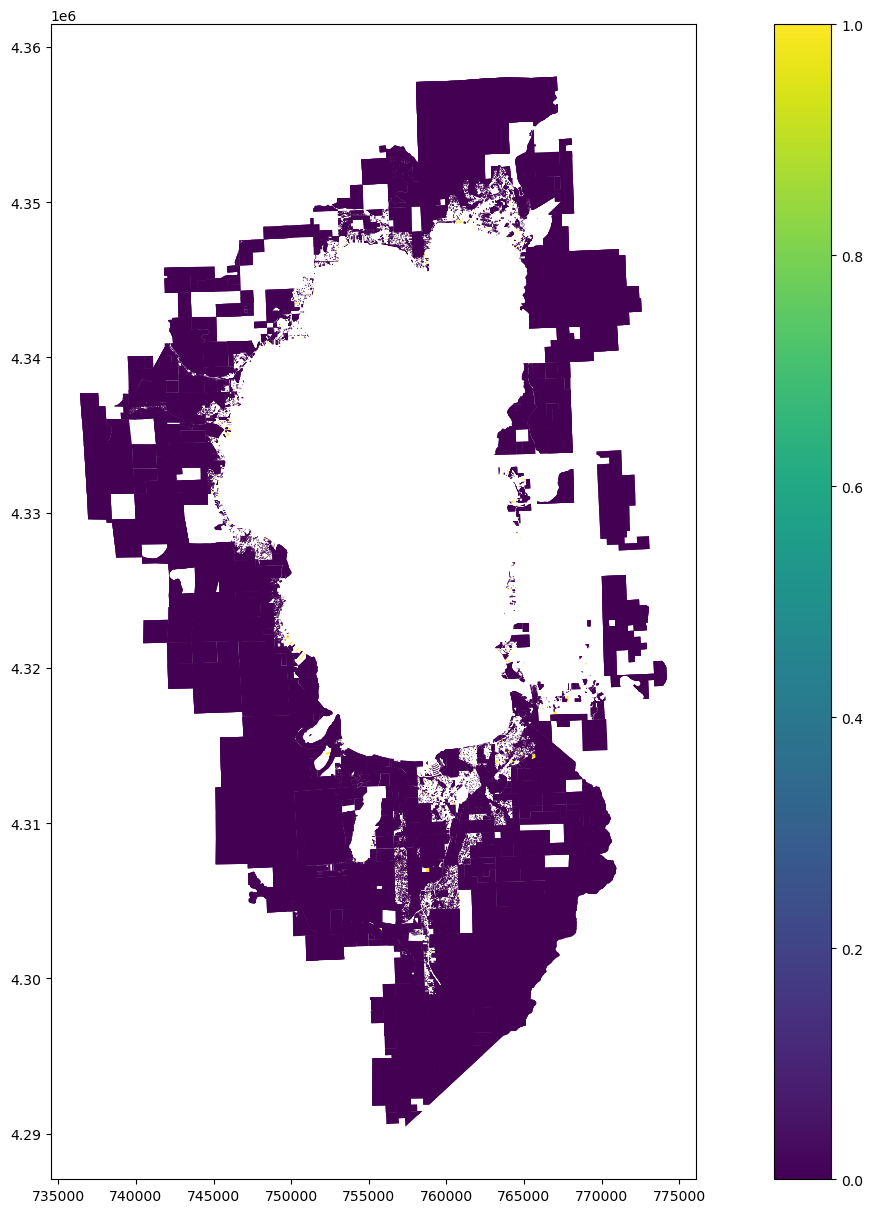

In [229]:
all_alternatives.set_geometry('polygeom').plot('chosen', legend=True, figsize=(20,15))

chosen
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: neighbors_per_built, dtype: object

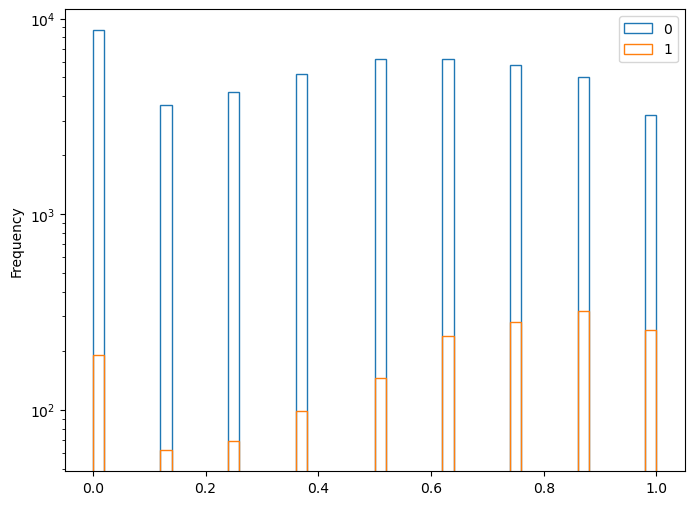

In [230]:
fig, ax = plt.subplots(figsize=(8,6))
hist, bins = np.histogram(all_alternatives['neighbors_per_built'], bins=50)
all_alternatives.groupby('chosen')['neighbors_per_built'].plot(kind='hist', ax=ax, bins=bins, log=True, 
                                                         histtype='step', legend=True)

In [231]:
all_alternatives['ID']=pd.factorize(all_alternatives['choice'])[0]+1
all_alternatives['Alt_ID'] = all_alternatives.groupby('choice')['APN'].rank(ascending=False, method='first').astype(int)
all_alternatives['Alt_Name']=all_alternatives['Alt_ID'].map(lambda x: str(x)+'ALt')
all_alternatives.sort_values(by=['ID','Alt_ID']) 

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,neighbors_lval_per_sqft_n,neighbors_bldsqft_per_unit_n,neighbors_age_n,is_towncenter,is_outsidebuffer,choice,chosen,ID,Alt_ID,Alt_Name
28,1318-23-315-045,1.318233e+11,270,Single Family Residential Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,0.644155,0.000000,0.000000,0,0,122-100-26,0,1,1,1ALt
9,129-210-01,1.292100e+07,120,"Vacant, single family",Open Space,Residential,0.0,48300,0.0,48300,...,0.361331,0.000000,0.000000,0,1,122-100-26,0,1,2,2ALt
8,125-382-01,1.253820e+07,120,"Vacant, single family",Vacant,Residential,NaN,101063,0.0,101062,...,0.313867,0.590543,0.013234,0,1,122-100-26,0,1,3,3ALt
10,125-231-15,1.252312e+07,120,"Vacant, single family",Open Space,Residential,636.0,96250,0.0,96250,...,0.333387,0.597042,0.011841,0,1,122-100-26,0,1,4,4ALt
2029,122-100-26,1.221003e+07,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,2919359.0,8904359,...,0.538844,0.651181,0.014428,0,1,122-100-26,1,1,5,5ALt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48177,029-422-027,2.942203e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,0.304108,0.575066,0.020958,0,1,112-250-034,0,1662,26,26ALt
48188,027-204-036,2.720404e+07,31,DEV COM MISC. IMPROVED COMMERCIAL,Commercial,Residential,NaN,51038,153166.0,204204,...,0.158751,0.556062,0.024876,0,0,112-250-034,0,1662,27,27ALt
48172,025-313-007,2.531301e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,950.0,157100,0.0,157100,...,0.285969,0.566389,0.020481,0,1,112-250-034,0,1662,28,28ALt
48169,022-092-025,2.209202e+07,60,VAC MSC VACANT RECREATIONAL LAND,Open Space,Residential,NaN,0,0.0,0,...,0.771836,0.580495,0.020398,0,1,112-250-034,0,1662,29,29ALt


In [232]:
sel_variables=['APN','usableland','AS_LANDVALUE','per_AS_IMPROVALUE','FAR','lval_per_sqft_n', 'neighbors_per_AS_IMPROVALUE',
               'neighbors_FAR','neighbors_per_built','neighbors_lval_per_sqft_n','neighbors_bldsqft_per_unit_n','neighbors_age_n',
         'WITHIN_TRPA_BNDY','cnt_intersections_n','isbailey4p', 'isbailey3', 'is_towncenter', 'is_outsidebuffer', 'IPES_SCORE_n', 'dist2tahoe_n',
         'Acres10p', 'Acres5to10', 'Acres1to5', 'Acreshalfto1acres', 'Acresquartertohalfacres','Acreslt4000sqft']

df_w=all_alternatives.pivot(index='ID', columns='Alt_ID', values=sel_variables+['choice','chosen'])
df_w.columns=[f'{col[0]}_{col[1]}' for col in df_w.columns]
df_w.reset_index(inplace=True)
df_w['choice']=df_w[[f'chosen_{c}' for c in range(1,31)]].idxmax(axis=1).map(lambda x: int(x.split('_')[1]))
df_w['APN']=df_w['choice_1']
df_w.drop(columns=['choice_'+str(i) for i in range(1,31)], inplace=True)
df_w.drop(columns=[f'chosen_{c}' for c in range(1,31)], inplace=True)
#df_w[df_w.columns[df_w.dtypes=='object'][30:-1]]=df_w[df_w.columns[df_w.dtypes=='object'][30:-1]].apply(pd.to_numeric, errors='coerce')
df_w.set_index('APN')

,ID,APN_1,APN_2,APN_3,APN_4,APN_5,APN_6,APN_7,APN_8,APN_9,...,Acreslt4000sqft_22,Acreslt4000sqft_23,Acreslt4000sqft_24,Acreslt4000sqft_25,Acreslt4000sqft_26,Acreslt4000sqft_27,Acreslt4000sqft_28,Acreslt4000sqft_29,Acreslt4000sqft_30,choice
APN,,,,,,,,,,,,,,,,,,,,,
122-100-26,1,1318-23-315-045,129-210-01,125-382-01,125-231-15,122-100-26,115-020-037,112-230-017,112-140-047,112-140-027,...,0,1,0,0,0,0,0,1,0,5
122-100-27,2,1319-19-710-050,1318-15-802-001,129-022-09,125-544-08,125-531-04,125-531-01,122-100-27,112-171-014,098-144-003,...,1,1,1,1,0,0,0,0,0,7
122-100-28,3,1318-26-501-006,128-060-13,126-560-09,126-083-38,125-191-01,122-100-28,117-071-027,112-171-002,112-070-021,...,1,1,1,0,0,0,1,0,0,6
122-111-02,4,132-550-00,1318-22-711-003,1318-22-317-003,129-650-46,125-373-05,122-111-02,117-130-027,117-110-073,115-050-003,...,0,0,1,0,0,0,0,0,0,6
122-126-16,5,1319-30-622-000,1319-30-522-000,128-060-06,126-261-04,123-121-13,122-126-16,112-270-063,112-160-034,094-140-051,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
090-113-020,1658,125-443-08,117-110-045,117-040-031,112-160-021,098-177-002,093-020-026,090-191-040,090-113-020,090-104-004,...,0,0,0,1,0,0,0,0,0,8
117-150-044,1659,1418-34-202-006,1418-03-810-001,1318-10-310-071,125-174-09,117-150-044,098-320-024,097-073-044,091-100-015,090-174-030,...,0,0,0,0,1,0,0,0,0,5
111-270-061,1660,131-213-08,126-540-34,126-521-14,112-250-019,112-160-018,112-160-015,111-270-061,097-092-007,094-124-014,...,0,1,0,1,0,0,0,0,0,7


In [233]:
#Create 3 different market segmentations  
devtypes={'Single Family Residential':0,'Condominium':0,'Condominium Common Area':0, 'Multi-Family Residential':0, 'Commercial':1, 'Public Service':1, 'Tourist Accommodation' :1 }
developed_parcels['DEV2TYPE']=developed_parcels['EXISTING_LANDUSE'].map(lambda x: devtypes[x]) 

devtypes={'Single Family Residential':0,'Condominium':1,'Condominium Common Area':1, 'Multi-Family Residential':1, 'Commercial':2, 'Public Service':2, 'Tourist Accommodation' :2 }
developed_parcels['DEV3TYPE']=developed_parcels['EXISTING_LANDUSE'].map(lambda x: devtypes[x])    

devtypes={'Single Family Residential':0,'Condominium':1,'Condominium Common Area':1, 'Multi-Family Residential':2, 'Commercial':3, 'Public Service':4, 'Tourist Accommodation' :5 }
developed_parcels['DEV5TYPE']=developed_parcels['EXISTING_LANDUSE'].map(lambda x: devtypes[x]) 

df_w=df_w.merge(developed_parcels[['APN','DEV2TYPE','DEV3TYPE','DEV5TYPE']], on='APN', how='inner')
df_w

,ID,APN_1,APN_2,APN_3,APN_4,APN_5,APN_6,APN_7,APN_8,APN_9,...,Acreslt4000sqft_26,Acreslt4000sqft_27,Acreslt4000sqft_28,Acreslt4000sqft_29,Acreslt4000sqft_30,choice,APN,DEV2TYPE,DEV3TYPE,DEV5TYPE
0,1,1318-23-315-045,129-210-01,125-382-01,125-231-15,122-100-26,115-020-037,112-230-017,112-140-047,112-140-027,...,0,0,0,1,0,5,122-100-26,0,0,0
1,2,1319-19-710-050,1318-15-802-001,129-022-09,125-544-08,125-531-04,125-531-01,122-100-27,112-171-014,098-144-003,...,0,0,0,0,0,7,122-100-27,0,0,0
2,3,1318-26-501-006,128-060-13,126-560-09,126-083-38,125-191-01,122-100-28,117-071-027,112-171-002,112-070-021,...,0,0,1,0,0,6,122-100-28,0,0,0
3,4,132-550-00,1318-22-711-003,1318-22-317-003,129-650-46,125-373-05,122-111-02,117-130-027,117-110-073,115-050-003,...,0,0,0,0,0,6,122-111-02,0,0,0
4,5,1319-30-622-000,1319-30-522-000,128-060-06,126-261-04,123-121-13,122-126-16,112-270-063,112-160-034,094-140-051,...,0,0,0,0,0,6,122-126-16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1658,125-443-08,117-110-045,117-040-031,112-160-021,098-177-002,093-020-026,090-191-040,090-113-020,090-104-004,...,0,0,0,0,0,8,090-113-020,0,0,0
1658,1659,1418-34-202-006,1418-03-810-001,1318-10-310-071,125-174-09,117-150-044,098-320-024,097-073-044,091-100-015,090-174-030,...,1,0,0,0,0,5,117-150-044,0,1,1
1659,1660,131-213-08,126-540-34,126-521-14,112-250-019,112-160-018,112-160-015,111-270-061,097-092-007,094-124-014,...,0,0,0,0,0,7,111-270-061,0,0,0
1660,1661,880-353-081,125-541-22,112-280-040,112-110-012,112-050-015,098-330-015,098-163-001,093-500-029,093-490-005,...,0,1,1,0,0,3,112-280-040,0,0,0


In [234]:
#IDentify characteristic varables
char_columns = df_w.select_dtypes(['object']).columns
char_columns.to_list()

['APN_1',
 'APN_2',
 'APN_3',
 'APN_4',
 'APN_5',
 'APN_6',
 'APN_7',
 'APN_8',
 'APN_9',
 'APN_10',
 'APN_11',
 'APN_12',
 'APN_13',
 'APN_14',
 'APN_15',
 'APN_16',
 'APN_17',
 'APN_18',
 'APN_19',
 'APN_20',
 'APN_21',
 'APN_22',
 'APN_23',
 'APN_24',
 'APN_25',
 'APN_26',
 'APN_27',
 'APN_28',
 'APN_29',
 'APN_30',
 'usableland_1',
 'usableland_2',
 'usableland_3',
 'usableland_4',
 'usableland_5',
 'usableland_6',
 'usableland_7',
 'usableland_8',
 'usableland_9',
 'usableland_10',
 'usableland_11',
 'usableland_12',
 'usableland_13',
 'usableland_14',
 'usableland_15',
 'usableland_16',
 'usableland_17',
 'usableland_18',
 'usableland_19',
 'usableland_20',
 'usableland_21',
 'usableland_22',
 'usableland_23',
 'usableland_24',
 'usableland_25',
 'usableland_26',
 'usableland_27',
 'usableland_28',
 'usableland_29',
 'usableland_30',
 'AS_LANDVALUE_1',
 'AS_LANDVALUE_2',
 'AS_LANDVALUE_3',
 'AS_LANDVALUE_4',
 'AS_LANDVALUE_5',
 'AS_LANDVALUE_6',
 'AS_LANDVALUE_7',
 'AS_LANDVALUE_

In [235]:
#Coerce numeric variables to numeric
df_w[char_columns[30:-1]]=df_w[char_columns[30:-1]].apply(pd.to_numeric, errors='coerce')

In [236]:
#Doulbe check remaining character columns
char_columns = df_w.select_dtypes(['object']).columns
char_columns

Index(['APN_1', 'APN_2', 'APN_3', 'APN_4', 'APN_5', 'APN_6', 'APN_7', 'APN_8',
       'APN_9', 'APN_10', 'APN_11', 'APN_12', 'APN_13', 'APN_14', 'APN_15',
       'APN_16', 'APN_17', 'APN_18', 'APN_19', 'APN_20', 'APN_21', 'APN_22',
       'APN_23', 'APN_24', 'APN_25', 'APN_26', 'APN_27', 'APN_28', 'APN_29',
       'APN_30', 'APN'],
      dtype='object')

In [237]:
#Remove characteristic columns
df_w.drop(columns=char_columns, inplace=True)
df_w.fillna(0, inplace=True)

In [238]:
#Create av columns required by BIOGEME to indicate whether the parcel alternative is available for development choice
ncols_df = pd.DataFrame(index=df_w.index)

ncols=['av_'+str(i) for i in range(1,31)]
for c in ncols:
    ncols_df[c]=1

df_w = pd.concat([df_w, ncols_df], axis=1).copy()

for i in range(1,31):
    df_w.loc[:,'av_'+str(i)]=1


In [239]:
#import biogeme libraries
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme import database as db
from biogeme.catalog import segmentation_catalogs
from biogeme.results import compile_estimation_results, pareto_optimal

# Define choice variabl
choice_var = "choice"
database=db.Database("resdev_db",df_w)
globals().update(database.variables)
database.variables

{'ID': ID,
 'usableland_1': usableland_1,
 'usableland_2': usableland_2,
 'usableland_3': usableland_3,
 'usableland_4': usableland_4,
 'usableland_5': usableland_5,
 'usableland_6': usableland_6,
 'usableland_7': usableland_7,
 'usableland_8': usableland_8,
 'usableland_9': usableland_9,
 'usableland_10': usableland_10,
 'usableland_11': usableland_11,
 'usableland_12': usableland_12,
 'usableland_13': usableland_13,
 'usableland_14': usableland_14,
 'usableland_15': usableland_15,
 'usableland_16': usableland_16,
 'usableland_17': usableland_17,
 'usableland_18': usableland_18,
 'usableland_19': usableland_19,
 'usableland_20': usableland_20,
 'usableland_21': usableland_21,
 'usableland_22': usableland_22,
 'usableland_23': usableland_23,
 'usableland_24': usableland_24,
 'usableland_25': usableland_25,
 'usableland_26': usableland_26,
 'usableland_27': usableland_27,
 'usableland_28': usableland_28,
 'usableland_29': usableland_29,
 'usableland_30': usableland_30,
 'AS_LANDVALUE_1'

In [264]:
sel_variables=['lval_per_sqft_n', 'neighbors_per_AS_IMPROVALUE','neighbors_age_n',
               'neighbors_FAR','neighbors_per_built','neighbors_lval_per_sqft_n','neighbors_bldsqft_per_unit_n',
         'WITHIN_TRPA_BNDY','cnt_intersections_n','isbailey4p', 'isbailey3', 'is_towncenter', 
               'is_outsidebuffer', 'IPES_SCORE_n','dist2tahoe_n', 'Acres10p', 'Acreslt4000sqft' ]



     

#define beta to be estimated for utility funciton
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)
    #expr="(B_"+c+"_catalog,)=  segmentation_catalogs(generic_name='B_"+c+"', beta_parameters=[B_"+c+"], potential_segmentations=(segmentation_devtype, ),  maximum_number=1,)"
    #print(expr)
    #exec(expr)

for i in range(1,31):
    #betasMultiVar=["B_"+c+"_catalog*"+c+"_"+str(i) for c in sel_variables]
    betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables]
    expr="V"+str(i)+"="+"+".join(betasMultiVar)
    #print(expr)
    exec(expr)

V={}
for i in range(1,31):
    expr="V["+str(i)+"]=V"+str(i)
    exec(expr)
    
av={i:eval('av_'+str(i)) for i in range(1,31)}
logprob=models.loglogit(V,av,choice)
mybiogeme=bio.BIOGEME(database, logprob)
mybiogeme.modelName='trpadev_logit'

results=mybiogeme.estimate()
#results=mybiogeme.estimate_catalog()
print(results.shortSummary())

# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model trpadev_logit
Nbr of parameters:		17
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2703.656
Akaike Information Criterion:	5441.311
Bayesian Information Criterion:	5533.379

                                    Value  Rob. Std err    Rob. t-test  \
B_Acres10p                      -2.551566      1.011043  -2.523696e+00   
B_Acreslt4000sqft               -0.918288      0.093666  -9.803849e+00   
B_IPES_SCORE_n                   0.152763      0.100921   1.513688e+00   
B_WITHIN_TRPA_BNDY               0.685297      0.444921   1.540265e+00   
B_cnt_intersections_n            0.793577      0.192864   4.114705e+00   
B_dist2tahoe_n                   3.177029      0.264229   1.202376e+01   
B_is_outsidebuffer               0.076200      0.089449   8.518839e-01   
B_is_towncenter                 -0.073251      0.166155  -4.408629e-01   
B_isbailey3                      0.579221      0.130530   4.437451e+00   
B_isbailey4p                     0.451687      0.078

In [268]:
best_acc=0
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
#define beta to be estimated for utility funciton

    
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)
    
while len(sel_variables)>0:
    for i in range(1,31):
        betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables]
        expr="V"+str(i)+"="+"+".join(betasMultiVar)
        #print(expr)
        exec(expr)

    V={}
    for i in range(1,31):
        expr="V["+str(i)+"]=V"+str(i)
        exec(expr)
    
    av={i:eval('av_'+str(i)) for i in range(1,31)}
    logprob=models.loglogit(V,av,choice)
    mybiogeme=bio.BIOGEME(database, logprob)
    mybiogeme.modelName='resdev_logit'

    results=mybiogeme.estimate()
    print(results.shortSummary())

    # Get the results in a pandas table
    pandas_results = results.getEstimatedParameters()
    print(pandas_results)
    
    stats = results.getGeneralStatistics()
    cur_acc=1-(stats['Final log likelihood'].value-len(sel_variables))/nulllog
    print(cur_acc)
    if cur_acc<best_acc:
        break
    else:
        best_acc=cur_acc
    worst_p=pandas_results['Rob. p-value'].idxmax()
    sel_variables.remove(worst_p[2:])
    print(sel_variables)

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		14
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2706.337
Akaike Information Criterion:	5440.674
Bayesian Information Criterion:	5516.495

                                    Value  Rob. Std err    Rob. t-test  \
B_Acres10p                      -2.582937      1.010956  -2.554944e+00   
B_Acreslt4000sqft               -0.937050      0.093722  -9.998218e+00   
B_IPES_SCORE_n                   0.179451      0.099944   1.795520e+00   
B_cnt_intersections_n            0.760715      0.191321   3.976114e+00   
B_dist2tahoe_n                   3.141098      0.263700   1.191161e+01   
B_isbailey3                      0.601834      0.130010   4.629147e+00   
B_isbailey4p                     0.458525      0.078190   5.864245e+00   
B_lval_per_sqft_n               10.968078      0.237536   4.617435e+01   
B_neighbors_FAR                 -2.090112      0.286432  -7.297062e+00   
B_neighbors_age_n                1.620939      0.2288

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		13
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2708.288
Akaike Information Criterion:	5442.576
Bayesian Information Criterion:	5512.981

                                    Value  Rob. Std err    Rob. t-test  \
B_Acres10p                      -2.630575      1.011258  -2.601290e+00   
B_Acreslt4000sqft               -0.946607      0.094404  -1.002717e+01   
B_cnt_intersections_n            0.782329      0.192292   4.068430e+00   
B_dist2tahoe_n                   3.229066      0.261379   1.235394e+01   
B_isbailey3                      0.613072      0.129282   4.742144e+00   
B_isbailey4p                     0.476800      0.076720   6.214853e+00   
B_lval_per_sqft_n               11.031576      0.235994   4.674510e+01   
B_neighbors_FAR                 -2.061087      0.284719  -7.239031e+00   
B_neighbors_age_n                1.603235      0.230538   6.954325e+00   
B_neighbors_bldsqft_per_unit_n  -1.769039      0.2337

In [269]:
# Get general statistics
print('General statistics')
print('------------------')
stats = results.getGeneralStatistics()
for description, (value, formatting) in stats.items():
    print(f'{description}: {value:{formatting}}')

General statistics
------------------
Number of estimated parameters: 13
Sample size: 1662
Excluded observations: 0
Init log likelihood: -2708.865
Final log likelihood: -2708.288
Likelihood ratio test for the init. model: 1.153005
Rho-square for the init. model: 0.000213
Rho-square-bar for the init. model: -0.00459
Akaike Information Criterion: 5442.576
Bayesian Information Criterion: 5512.981
Final gradient norm: 2.4668E-05
Nbr of threads: 32


In [270]:
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
modified_Rho_Sq=1-(stats['Final log likelihood'].value-len(sel_variables))/nulllog
modified_Rho_Sq

0.5185938295351941

In [271]:
pandas_results['fields']=pandas_results.index
pandas_results.to_csv(r'.\development_model.csv', index=False)
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value,fields
B_Acres10p,-2.630575,1.011258,-2.601290e+00,9.287403e-03,B_Acres10p
B_Acreslt4000sqft,-0.946607,0.094404,-1.002717e+01,0.000000e+00,B_Acreslt4000sqft
B_cnt_intersections_n,0.782329,0.192292,4.068430e+00,4.733094e-05,B_cnt_intersections_n
B_dist2tahoe_n,3.229066,0.261379,1.235394e+01,0.000000e+00,B_dist2tahoe_n
B_isbailey3,0.613072,0.129282,4.742144e+00,2.114677e-06,B_isbailey3
B_isbailey4p,0.476800,0.076720,6.214853e+00,5.137266e-10,B_isbailey4p
B_lval_per_sqft_n,11.031576,0.235994,4.674510e+01,0.000000e+00,B_lval_per_sqft_n
B_neighbors_FAR,-2.061087,0.284719,-7.239031e+00,4.518608e-13,B_neighbors_FAR
B_neighbors_age_n,1.603235,0.230538,6.954325e+00,3.542500e-12,B_neighbors_age_n
B_neighbors_bldsqft_per_unit_n,-1.769039,0.233700,-7.569709e+00,3.730349e-14,B_neighbors_bldsqft_per_unit_n


In [273]:
sel_variables=[c[2:] for c in pandas_results.loc[pandas_results.Value!=0].index]

sel_variables_1=['isbailey3','isbailey4p','IPES_SCORE_n' ]
sel_variables_2=[c for c in sel_variables if c not in sel_variables_2]

segmentation_dev2types = database.generate_segmentation(
    variable='DEV2TYPE', mapping={0: 'RES', 1: 'NR'}
)

segmentation_dev3types = database.generate_segmentation(
    variable='DEV3TYPE', mapping={0: 'SF', 1: 'MF', 2: 'NR'}
)

segmentation_dev5types = database.generate_segmentation(
    variable='DEV5TYPE', mapping={0: 'SF', 1: 'Con', 2: 'MF', 3: 'COM', 4: 'PUB', 5: 'Tour'}
)


#define beta to be estimated for utility funciton
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)


#define catalog for market segmentations to be analyzed
expr="("+",".join(["B_"+c+"_catalog" for c in sel_variables_2])+")=segmentation_catalogs(generic_name='B_catalog', beta_parameters=["+",".join(["B_"+c for c in sel_variables_2])+"], potential_segmentations=(segmentation_dev2types,segmentation_dev3types,segmentation_dev5types, ),  maximum_number=1)"
print(expr)
exec(expr)

for i in range(1,31):
    #betasMultiVar=["B_"+c+"_catalog*"+c+"_"+str(i) for c in sel_variables]
    betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables_1]
    betasMultiVar_catalog=["B_"+c+"_catalog*"+c+"_"+str(i) for c in sel_variables_2]
    expr="V"+str(i)+"="+"+".join(betasMultiVar)+"+"+"+".join(betasMultiVar_catalog)
    #print(expr)
    exec(expr)

V={}
for i in range(1,31):
    expr="V["+str(i)+"]=V"+str(i)
    exec(expr)
    
av={i:eval('av_'+str(i)) for i in range(1,31)}
logprob=models.loglogit(V,av,choice)
mybiogeme=bio.BIOGEME(database, logprob)
mybiogeme.modelName='trpadev_logit'

#results=mybiogeme.estimate()
results=mybiogeme.estimate_catalog()
print(results)
compiled_results, specs = compile_estimation_results(
    results, use_short_names=True
)


for short_name, spec in specs.items():
    print(f'{short_name}\t{spec}')

pareto_results = pareto_optimal(results)
compiled_pareto_results, pareto_specs = compile_estimation_results(
    pareto_results, use_short_names=True
)



(B_Acres10p_catalog,B_Acreslt4000sqft_catalog,B_cnt_intersections_n_catalog,B_dist2tahoe_n_catalog,B_isbailey3_catalog,B_isbailey4p_catalog,B_lval_per_sqft_n_catalog,B_neighbors_FAR_catalog,B_neighbors_age_n_catalog,B_neighbors_bldsqft_per_unit_n_catalog,B_neighbors_lval_per_sqft_n_catalog,B_neighbors_per_built_catalog)=segmentation_catalogs(generic_name='B_catalog', beta_parameters=[B_Acres10p,B_Acreslt4000sqft,B_cnt_intersections_n,B_dist2tahoe_n,B_isbailey3,B_isbailey4p,B_lval_per_sqft_n,B_neighbors_FAR,B_neighbors_age_n,B_neighbors_bldsqft_per_unit_n,B_neighbors_lval_per_sqft_n,B_neighbors_per_built], potential_segmentations=(segmentation_dev2types,segmentation_dev3types,segmentation_dev5types, ),  maximum_number=1)


No Pareto file has been provided


{'B_catalog:no_seg': <biogeme.results.bioResults object at 0x000001950230B770>, 'B_catalog:DEV3TYPE': <biogeme.results.bioResults object at 0x0000019536AF2AB0>, 'B_catalog:DEV2TYPE': <biogeme.results.bioResults object at 0x000001952F827290>, 'B_catalog:DEV5TYPE': <biogeme.results.bioResults object at 0x0000019396E16420>}
Model_000000	B_catalog:no_seg
Model_000001	B_catalog:DEV3TYPE
Model_000002	B_catalog:DEV2TYPE
Model_000003	B_catalog:DEV5TYPE


In [274]:
compiled_pareto_results

,Model_000000,Model_000001,Model_000002,Model_000003
Number of estimated parameters,25,13,37,73
Sample size,1662,1662,1662,1662
Final log likelihood,-2679.581321,-2706.336848,-2638.204004,-2605.451745
Akaike Information Criterion,5409.162641,5438.673696,5350.408008,5356.90349
Bayesian Information Criterion,5544.557066,5509.078796,5550.791756,5752.255209
...,...,...,...,...
B_neighbors_lval_per_sqft_n_Tour (t-test),,,,12.9 (10.9)
B_neighbors_per_built_COM (t-test),,,,-5.67 (-3.59)
B_neighbors_per_built_Con (t-test),,,,-5.91 (-2.54)
B_neighbors_per_built_PUB (t-test),,,,8.71 (17.9)


In [275]:
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
modified_Rho_Sq=1-(compiled_pareto_results.loc['Final log likelihood']-len(sel_variables))/nulllog
modified_Rho_Sq

Model_000000    0.523849
Model_000001    0.519116
Model_000002    0.531169
Model_000003    0.536963
Name: Final log likelihood, dtype: object

In [276]:
pandas_results=pareto_results['B_catalog:DEV3TYPE'].getEstimatedParameters()
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value
B_Acres10p,-2.556749,1.013693,-2.522213,1.166189e-02
B_Acres10p_MF,-4.627944,1.240212,-3.731573,1.902876e-04
B_Acres10p_NR,-3.954222,1.208560,-3.271846,1.068479e-03
B_Acreslt4000sqft,-1.084675,0.101689,-10.666613,0.000000e+00
B_Acreslt4000sqft_MF,1.566694,0.387966,4.038230,5.385613e-05
B_Acreslt4000sqft_NR,0.694621,0.571092,1.216303,2.238696e-01
B_IPES_SCORE_n,0.204056,0.101787,2.004748,4.499005e-02
B_cnt_intersections_n,0.612874,0.201482,3.041827,2.351469e-03
B_cnt_intersections_n_MF,1.763319,0.846007,2.084285,3.713423e-02
B_cnt_intersections_n_NR,1.187804,1.228583,0.966808,3.336401e-01


In [277]:
pandas_results['x1'] =['' if c in ['B_'+s for s in sel_variables_1] else 'MF' if c.endswith('_MF') else 'NR' if c.endswith('_NR') else 'SF' for c in pandas_results.index]
pandas_results['x2'] =[c[2:-3] if c.endswith('_MF') or c.endswith('_NR') else c[2:] for c in pandas_results.index]
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value,x1,x2
B_Acres10p,-2.556749,1.013693,-2.522213,1.166189e-02,SF,Acres10p
B_Acres10p_MF,-4.627944,1.240212,-3.731573,1.902876e-04,MF,Acres10p
B_Acres10p_NR,-3.954222,1.208560,-3.271846,1.068479e-03,NR,Acres10p
B_Acreslt4000sqft,-1.084675,0.101689,-10.666613,0.000000e+00,SF,Acreslt4000sqft
B_Acreslt4000sqft_MF,1.566694,0.387966,4.038230,5.385613e-05,MF,Acreslt4000sqft
B_Acreslt4000sqft_NR,0.694621,0.571092,1.216303,2.238696e-01,NR,Acreslt4000sqft
B_IPES_SCORE_n,0.204056,0.101787,2.004748,4.499005e-02,,IPES_SCORE_n
B_cnt_intersections_n,0.612874,0.201482,3.041827,2.351469e-03,SF,cnt_intersections_n
B_cnt_intersections_n_MF,1.763319,0.846007,2.084285,3.713423e-02,MF,cnt_intersections_n
B_cnt_intersections_n_NR,1.187804,1.228583,0.966808,3.336401e-01,NR,cnt_intersections_n


In [278]:
LU_types = pandas_results.x1.unique()[1:]

common = pandas_results[pandas_results['x1'] == '']


os.makedirs(r'.\devmodel', exist_ok=True) 
for LU_type in LU_types:
    df_LU_type = pandas_results[(pandas_results['x1'] == LU_type) | (pandas_results['x1'] == '')]
    
    spath = os.path.join(r'.\devmodel', f'{LU_type.lower()}_development_model.csv')
    df_LU_type.drop(columns=['x1']).rename(columns={'x2':'x'}).to_csv(spath, index=False)



In [279]:
Parcels.loc[~Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats) & (Parcels.BUILDING_SQFT==0),'EXISTING_LANDUSE'].unique()

array(['Open Space', 'Vacant', 'Public Service', 'Recreation',
       'Single Family Residential', 'Commercial',
       'Multi-Family Residential', 'Condominium Common Area',
       'Tourist Accommodation', ''], dtype=object)

In [280]:
Parcels.loc[~Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats) & (Parcels.BUILDING_SQFT>=0),'COUNTY_LANDUSE_DESCRIPTION'].unique()

array(['Vacant, commercial', 'Vacant, single family',
       'General Commercial: retail, mixed, parking, school',
       'Resort commercial: ski, golf, sports, etc.', 'Five to Nine Units',
       'Vacant - Single Family Residential',
       'Special Purpose with Minor Improvements',
       'Operating Communication, Transportation, and Utility Property of an Interstate or Intercounty Nature',
       'Vacant - Unknown/Other', 'Single Family Residence',
       'Single Family Residential with Minor Improvements - No livable structures',
       'General Commercial', 'Commercial Recreation',
       'Industrial with Minor Improvements',
       'Single Family Residential with Minor Improvements',
       'Two Single Family Units',
       'Commercial Industrial - retail or office use combined with Industrial use',
       'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
       'VAC MSC VAC

In [281]:
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats),'devstatus']='Undevelopable'

sf_cats=['Vacant - Single Family Residential',
        'Single Family Residential with Minor Improvements - No livable structures',
         'Single Family Residential with Minor Improvements',
        'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
        'VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
       'DEV RES RESIDENCE ON LEASED LAND',
        'DEV RES RURAL RES. 2.51-20.0 AC. 1 SF UNIT',
        'VAC RES NON-RES. IMPROVEMENTS <=2.5 AC.',
        'DEV RES SINGLE FAM. RES. <=2.5 AC.(INC. MAN. HMS',
        'VACANT, ALL TYPES-NOT ASGND', 
      'VACANT, SUBDIVIDED RESIDENTIAL',
      'Single Family Residence', 
         'SINGLE FAM RES, HALF PLEX', 
        '3 SINGLE FAM RES, TRIPLEX']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(sf_cats),'devstatus']='SF'

In [282]:
mf_cats=['VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
         '2 SINGLE FAM RES, DUPLEX', 
       'MOBILE HOME OUTSIDE OF PARK',
      'Vacant, multi-residential',
   'Three to Four Units',
       'Five or More Units - Low Rise', 
        'Mixed Use with Multi-Family Residential as primary use',
       'Individual Residential Unit - Townhouse or Row House',
       'Vacant - Multi-Residential',
       'Manufactured Home Park - Ten or More Manufactured Home Units',
    'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'VAC MFR VACANT MULTI-RES. LAND 4+ UNITS ALLOWED',
       'DEV MFR MULTI-RESIDENTIAL 2-3 UNITS',
       'DEV COM MOBILE HOME PARKS', 'DEV MFR RETIREMENT HOUSING',
       'DEV RES MOBILE HOME ON RENTED LAND',
        'SINGLE FAM RES, HALF PLEX',  'RESIDENCE ON COMMERCIAL LAND',
        '3 SINGLE FAM RES, TRIPLEX',  'MOBILE HOME PARK',
    'TIMESHARES', 'APARTMENTS, 4 UNITS OR MORE']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(mf_cats),'devstatus']='MF'
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION=='VACANT, ALL TYPES-NOT ASGND','devstatus']='ALL'

In [283]:
nr_cats=['Vacant, commercial', 
       'Special Purpose with Minor Improvements',
       'Vacant - Unknown/Other',
       'Industrial with Minor Improvements',
       'Commercial Industrial - retail or office use combined with Industrial use',
       'DEV IND MISC. IMPROVED INDUSTRIAL PROPERTY',
       'DEV MSC SCHOOLS - SMALL (1-12 STUDENTS)', '',
       'VAC COM VACANT COMMERCIAL LAND',
       'DEV MSC TEMPORARY USE CODE FOR PROJECT 184',
       'DEV MSC COMMUNITY ORIENTED FACILITIES', 
       'DEV MSC MISC. IMPROVED RECREATIONAL',
       'MISC. PUBLIC BUILDINGS',
        'WAREHOUSE',
        'SCHOOLS', 'MISCELLANEOUS RECREATIONAL',
       'Common Area', 'Casino or hotel casino',
       'General Commercial: retail, mixed, parking, school',
       'Resort commercial: ski, golf, sports, etc.',
       'Vacant, under development', 
       'Commercial with Minor Improvements',
       'Offices, Professional and Business Services',
       'Casino or Hotel Casino',
       'General Industrial - light industry, trucking and warehousing, service, repair, etc.',
       'Commercial Living Accommodations',
        'Vacant - Commercial',
            'Industrial Auxiliary Area',
       'Industrial with Minor Improvements - with structures insufficient to determine intended use',
       'Commercial Common Area',
       'DEV COM MISC. IMPROVED COMMERCIAL',
       'VAC MSC SUBJ. TO OPEN SPACE CONTRACT (NOT CLCA)',
       'DEV MSC RURAL NON-RES. IMPROVEMENT 2.51-20.0 AC.',
       'DEV COM MOTEL, HOTEL', 'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'DEV COM RETAIL STORES >15,000 SQ. FT.', 'DEV COM RESTAURANT',
       'DEV COM SUPERMARKETS', 'DEV MSC SCHOOLS - LARGE (101+ STUDENTS)',
        'DEV COM PLACE OF WORSHIP',
       'DEV MSC SKI RESORTS', 'DEV IND OFFICES',
       'DEV IND LIGHT MANUFACTURING', 'VAC IND VACANT INDUSTRIAL LAND',
       'DEV COM SERVICE STATION', 'DEV COM RETAIL STORES <=5,000 SQ. FT.',
       'DEV COM RETAIL STORES 5,001-15,000 SQ. FT.',
        "MISCELLANEOUS COMM'L", 'MINI-STORAGE, COVERED STORAGE',
       'OFFICE CONDO', 'SERVICE STATION',
       'PARKING LOTS', 'LODGES, HALLS', 'HOTELS, MOTELS, RESORTS',
       'VACANT INDUSTRIAL', 'OFFICE GENERAL', 'CHURCHES',
       'COMMERCIAL STORE', 'RESTAURANTS, COCKTAIL LOUNGES', 'FAST FOOD RESTAURANT',
      'SUBURBAN STORE', 'MOBILE HOME PARK',
       'TENNIS, SWIMMING CLUBS', 'LIGHT INDUSTRIAL',
       'MINI-MARKET WITH GAS']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(nr_cats),'devstatus']='NR'

In [286]:
#Recalculate Neighborhood Infor to prepare 2020 data for future year forecasting
# remove the address/point itself from the array because it itself is its nearest neighbour
neighbors = neighbors[:, 1:]
#calculate neiboring parcels total land sqft
Parcels.loc[(Parcels.BUILDING_SQFT>0), 'bldage']=Parcels.loc[(Parcels.BUILDING_SQFT>0),'YEAR_BUILT'].map(lambda x: 2020-x)

#calculate neiboring parcels total building ages
nei_parcel['neighbors_age']= [
    Parcels['bldage'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels total value as_sum
nei_parcel['neighbors_AS_SUM']= [
    Parcels['AS_SUM'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_BUILDING_SQFT']= [
    Parcels['BUILDING_SQFT'].iloc[n].sum() for n in neighbors
]


#calculate neiboring parcels total building sqft
nei_parcel['neighbors_AS_IMPROVALUE']= [
    Parcels['AS_IMPROVALUE'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels percent with building_sqft>0
nei_parcel['neighbors_per_built']= [
   Parcels['BUILDING_SQFT'].iloc[n].map(lambda x: 1 if x>0 else 0).sum()/8.0 for n in neighbors
]

#calculate neiboring parcels total units
nei_parcel['neighbors_totalunits']= [
   Parcels['UNITS'].iloc[n].sum() for n in neighbors
]

#calculate neighboring parcels average percentage of improved value and FAR ratio
Parcels['neighbors_per_AS_IMPROVALUE']=nei_parcel['neighbors_AS_IMPROVALUE']/nei_parcel['neighbors_AS_SUM'].map(lambda x: x if x>0 else 1) 
Parcels['neighbors_FAR']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['neighbors_bldsqft_per_unit']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_totalunits'].map(lambda x: x if x>0 else 1)
Parcels['neighbors_unit_per_acre']=nei_parcel['neighbors_totalunits']*43560.0/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)

Parcels['neighbors_lval_per_sqft_n']=np.log(Parcels['neighbors_lval_per_sqft'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_lval_per_sqft'].max())
Parcels['neighbors_bldsqft_per_unit_n']=np.log(Parcels['neighbors_bldsqft_per_unit'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_bldsqft_per_unit'].max())
Parcels['neighbors_age_n']=Parcels['neighbors_age']/(Parcels['neighbors_per_built'].map(lambda x: 1 if (x==0) | (x is None) else x)*8)
Parcels['neighbors_age_n']=Parcels['neighbors_age_n']/Parcels['neighbors_age_n'].max()

In [293]:
model_vars=list(set(pandas_results['x2']))
for c in model_vars:
    Parcels[c]=Parcels[c].fillna(0)
pd.DataFrame(Parcels.drop(columns=['geometry'])).to_csv("../data//parcels_2020forolaf.csv", index=False)